<a href="https://colab.research.google.com/github/Manith-Ratnayake/Adult_Income_Census_UCI/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>[Google Drive Set Up](#scrollTo=qi4nzm-UbvwX)

>[Libraries](#scrollTo=9zrJ08dxDfxq)

>[File Reading](#scrollTo=oLJ-am5qb2e_)

>[Data Set Overview](#scrollTo=gpyoZus_mURE)

>[Column Overview](#scrollTo=FIwNDTGW1iFO)

>>>[Empty Columns](#scrollTo=662Cg6Vz4CMP)

>>>[Not Empty Columns](#scrollTo=VfmAT343QZce)

>[Missing Values](#scrollTo=q48TEBmyPIsZ)

>[Feature Engineering](#scrollTo=t8oCqWAxS3-n)

>[Visualize](#scrollTo=Zz3ZA2wcKTzw)

>[Encoding](#scrollTo=ZeiMv5cJTxDG)

>[Feature Scaling](#scrollTo=8cuu3Nx0HV7c)

>[Data Set Split](#scrollTo=nodSXMynmq2N)

>[Naive Bayes Model](#scrollTo=PcDBziRyl46t)

>>>>>[Naive Bayes Tune 1](#scrollTo=WBx7UA-QNzCi)

>>>>>[Naive Bays Tune 2](#scrollTo=5zTTlefsOf8o)

>>>>>[Naive Bays Tune 3](#scrollTo=-nXrvXdJOt7B)

>[Random Forest Model](#scrollTo=2PgUFKqHmAPN)

>>>>>[Random Forest Basic](#scrollTo=olhfzFolOAMh)

>>>>>[Random Forest Hyper Parameter Tuning](#scrollTo=5yM87jXLNqbZ)



#**Google Drive Set Up**

In [373]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Libraries**

In [374]:
# import warnings
# warnings.filterwarnings('ignore')

In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

#**File Reading**

In [376]:
# Location
adult_file_data_path = '/content/drive/My Drive/Machine Learning/adult.data'
adult_file_test_path = '/content/drive/My Drive/Machine Learning/adult.test'

# Reading
adult_data = pd.read_csv(adult_file_data_path, delimiter=',', header=None)
adult_test = pd.read_csv(adult_file_test_path, delimiter=',', header=None, skiprows=1)
# Columns
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                'hours-per-week', 'native-country', 'income']

adult_data.columns = column_names
adult_test.columns = column_names

#**Data Set Overview**

In [377]:
# Checking the first few rows
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [378]:
# Statistics
adult_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [379]:
# No of Rows and columns
adult_data.shape

(32561, 15)

In [380]:
# No of Rows and columns
adult_test.shape

(16281, 15)

#**Column Overview**

In [381]:
adult_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [382]:
adult_data.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

In [383]:
# Type
adult_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

###**Empty Columns**

In [384]:
adult_data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [385]:
adult_data['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [386]:
adult_data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

###**Not Empty Columns**

In [387]:
# Distribution of the target variable
adult_data['capital-gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital-gain, Length: 119, dtype: int64

In [388]:
# Gender
adult_data['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [389]:
# Education
adult_data['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [390]:
adult_data['education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

In [391]:
# Distribution of the target variable
adult_data['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

#**Missing Values**

In [392]:
adult_data['workclass'] = adult_data['workclass'].replace('?', 'Private')
adult_data['occupation'] = adult_data['occupation'].replace('?', 'Prof-specialty')
adult_data['native-country'] = adult_data['native-country'].replace('?', 'United-States')

# Same
adult_test['workclass'] = adult_test['workclass'].replace('?', 'Private')
adult_test['occupation'] = adult_test['occupation'].replace('?', 'Prof-specialty')
adult_test['native-country'] = adult_test['native-country'].replace('?', 'United-States')

#**Feature Engineering**

In [393]:
# education Category
adult_data.education= adult_data.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
adult_data.education = adult_data.education.replace('HS-grad', 'high school')
adult_data.education = adult_data.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
adult_data.education = adult_data.education.replace('Bachelors', 'undergrad')
adult_data.education = adult_data.education.replace('Masters', 'grad')
adult_data.education = adult_data.education.replace('Doctorate', 'doc')

# Same
adult_test.education= adult_test.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
adult_test.education = adult_test.education.replace('HS-grad', 'high school')
adult_test.education = adult_test.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
adult_test.education = adult_test.education.replace('Bachelors', 'undergrad')
adult_test.education = adult_test.education.replace('Masters', 'grad')
adult_test.education = adult_test.education.replace('Doctorate', 'doc')

In [394]:
#martial status
adult_data['marital-status']= adult_data['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
adult_data['marital-status'] = adult_data['marital-status'].replace(['Never-married'], 'not-married')
adult_data['marital-status'] = adult_data['marital-status'].replace(['Divorced', 'Separated','Widowed',
                                                'Married-spouse-absent'], 'other')


# Same
adult_test['marital-status'] = adult_test['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
adult_test['marital-status'] = adult_test['marital-status'].replace(['Never-married'], 'not-married')
adult_test['marital-status'] = adult_test['marital-status'].replace(['Divorced', 'Separated','Widowed',
                                                'Married-spouse-absent'], 'other')

In [395]:
# income
adult_data.income = adult_data.income.replace('<=50K', 0)
adult_data.income = adult_data.income.replace('>50K', 1)

# Same
adult_test.income = adult_test.income.replace('<=50K', 0)
adult_test.income = adult_test.income.replace('>50K', 1)

#**Visualize**

In [396]:
# # Binning fnlwgt into categories
# adult_data['fnlwgt_cat'] = pd.cut(adult_data['fnlwgt'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])

# # Using the binned category as hue
# seaborn.countplot(x='income', palette='coolwarm', hue='fnlwgt_cat', data=adult_data)
# plt.show()

<Axes: xlabel='income', ylabel='count'>

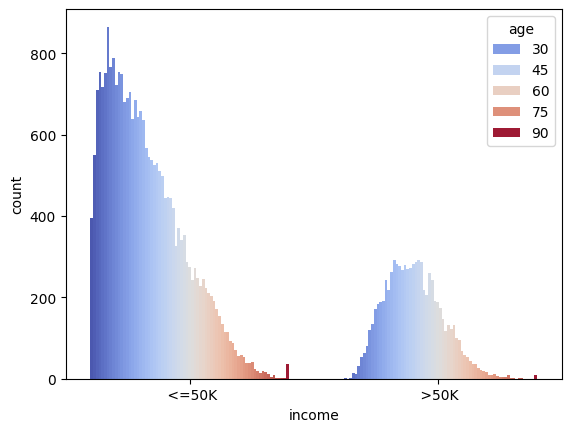

In [397]:
seaborn.countplot(x='income', palette='coolwarm', hue='age', data=adult_data)

<Axes: xlabel='income', ylabel='count'>

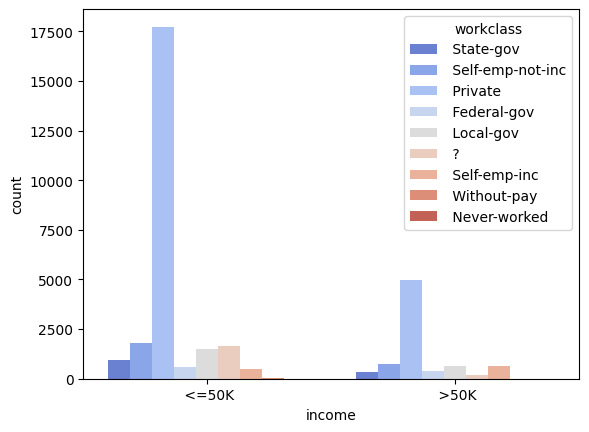

In [398]:
seaborn.countplot(x='income', palette='coolwarm', hue='workclass', data=adult_data)

<Axes: xlabel='income', ylabel='count'>

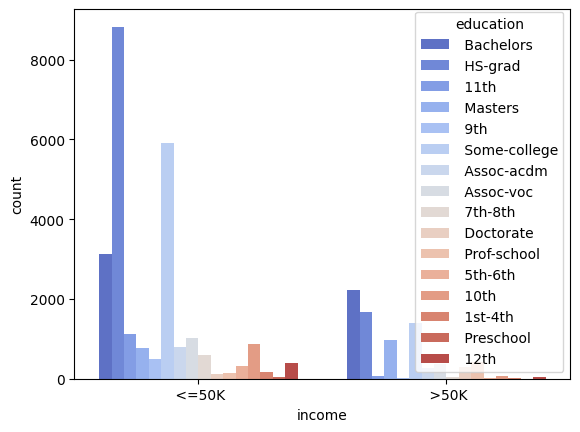

In [399]:
seaborn.countplot(x='income', palette='coolwarm', hue='education', data=adult_data)

<Axes: xlabel='income', ylabel='count'>

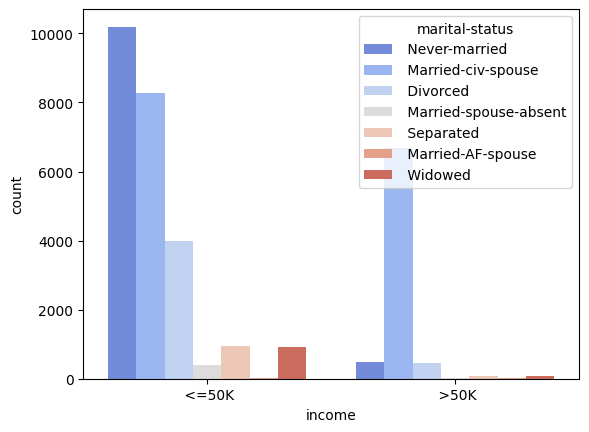

In [400]:
seaborn.countplot(x='income', palette='coolwarm', hue='marital-status', data=adult_data)

<Axes: xlabel='income', ylabel='count'>

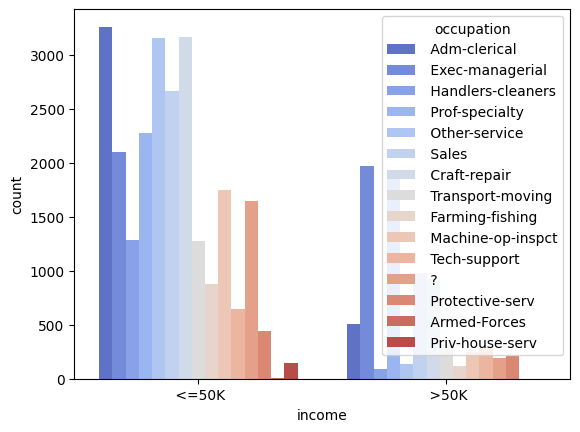

In [401]:
seaborn.countplot(x='income', palette='coolwarm', hue='occupation', data=adult_data)

<Axes: xlabel='income', ylabel='count'>

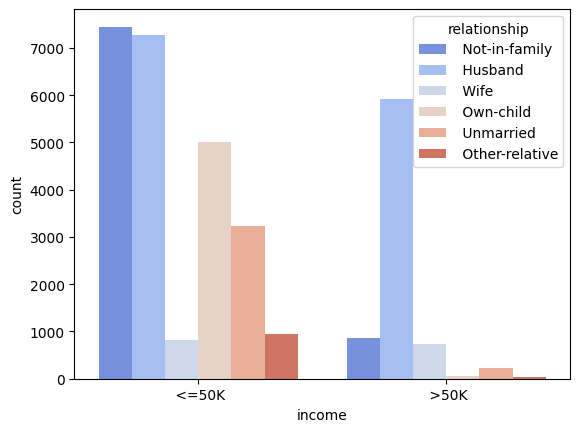

In [402]:
seaborn.countplot(x='income', palette='coolwarm', hue='relationship', data=adult_data)

<Axes: xlabel='income', ylabel='count'>

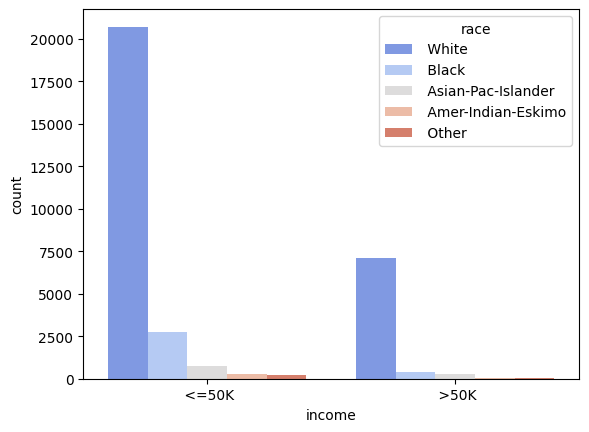

In [403]:
seaborn.countplot(x='income', palette='coolwarm', hue='race', data=adult_data)

<Axes: xlabel='income', ylabel='count'>

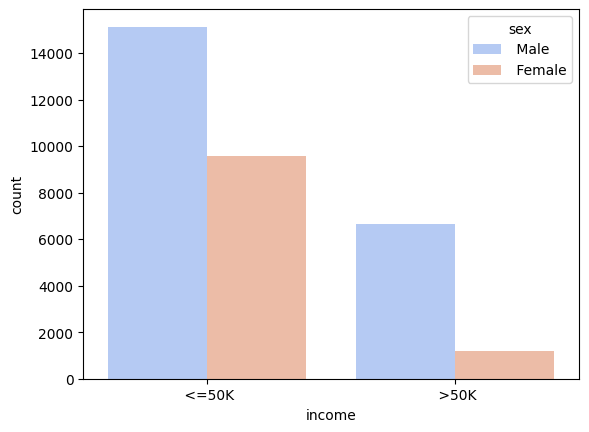

In [404]:
seaborn.countplot(x='income', palette='coolwarm', hue='sex', data=adult_data)

<Axes: xlabel='income', ylabel='count'>

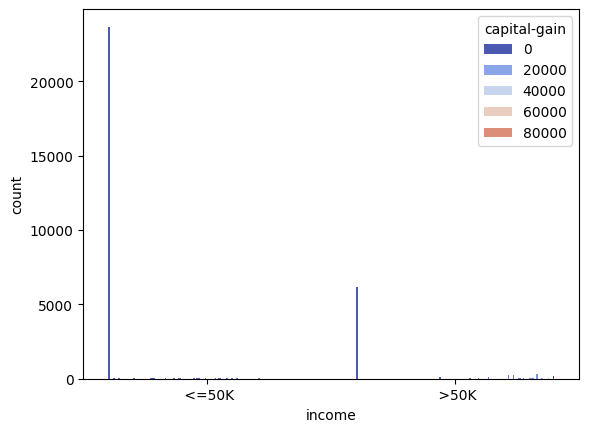

In [405]:
seaborn.countplot(x='income', palette='coolwarm', hue='capital-gain', data=adult_data)

<Axes: xlabel='income', ylabel='count'>

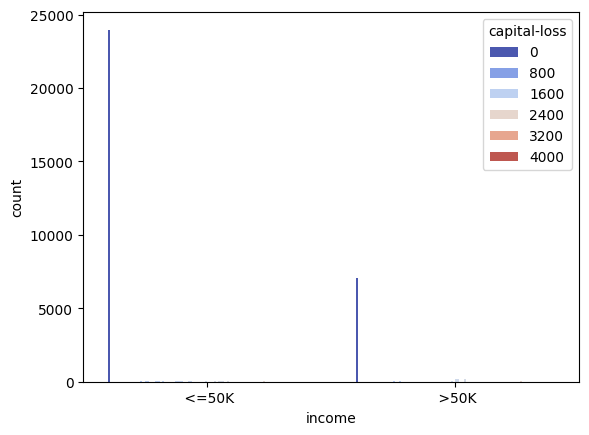

In [406]:
seaborn.countplot(x='income', palette='coolwarm', hue='capital-loss', data=adult_data)

<Axes: xlabel='income', ylabel='count'>

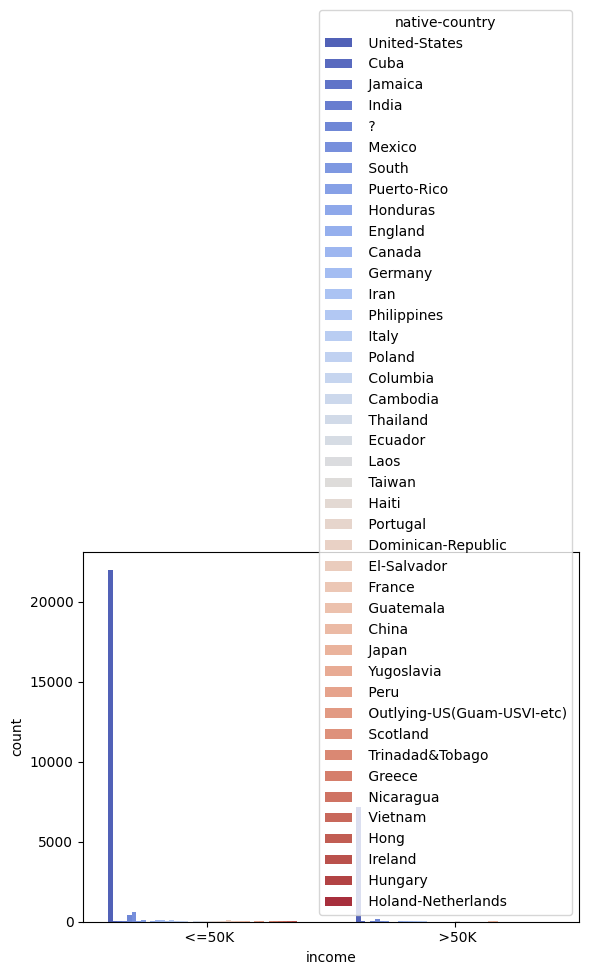

In [407]:
seaborn.countplot(x='income', palette='coolwarm', hue='native-country', data=adult_data)

In [408]:
adult_data.corr()

<ipython-input-408-54074e0db959>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  adult_data.corr()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


<ipython-input-409-cfe0b14f1046>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  seaborn.heatmap(adult_data.corr(), annot=True);


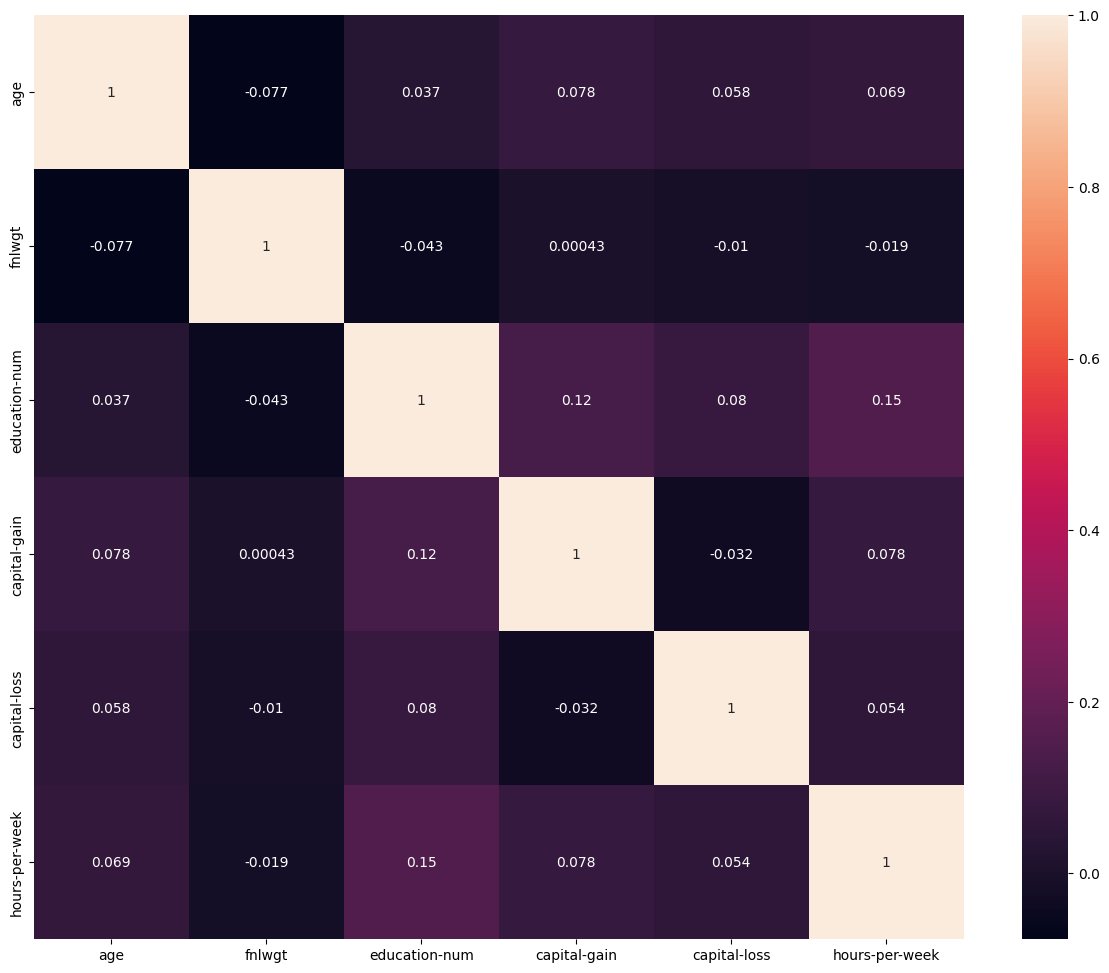

In [409]:
plt.figure(figsize=(15,12))
seaborn.heatmap(adult_data.corr(), annot=True);

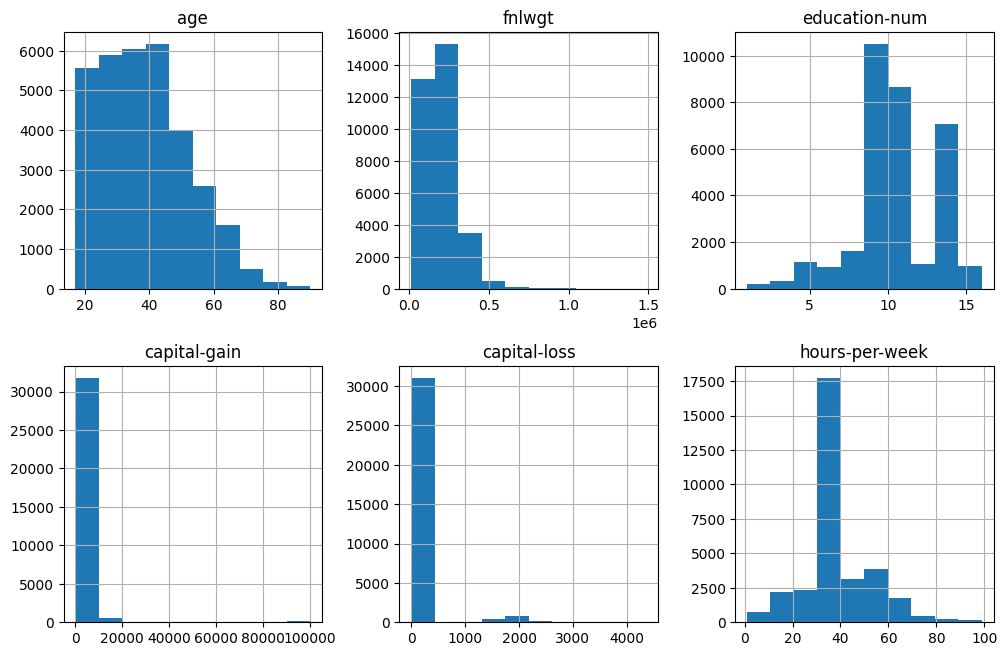

In [410]:
adult_data.hist(figsize=(12,12), layout=(3,3), sharex=False);

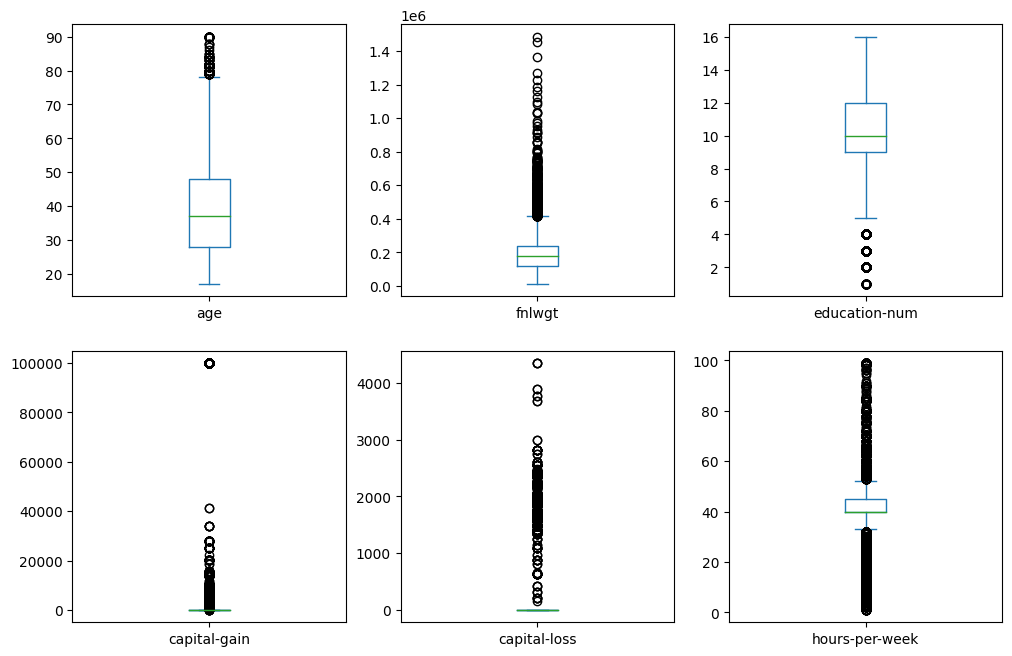

In [411]:
adult_data.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True);

#**Encoding**

In [412]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Preliminary cleaning: adjust the 'income' column in the test set to match the training set's format
adult_test['income'] = adult_test['income'].apply(lambda x: x.strip('.'))
adult_data['income'] = adult_data['income'].apply(lambda x: x.strip('.'))

# Further preprocessing steps
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
le = LabelEncoder()

# Apply Label Encoding for each categorical feature
for feature in categorical_features:
    # Combine training and test data, fit label encoder and transform them back
    combined = pd.concat([adult_data[feature], adult_test[feature]], axis=0)
    le.fit(combined)
    adult_data[feature] = le.transform(adult_data[feature])
    adult_test[feature] = le.transform(adult_test[feature])

# Encoding 'income' separately to maintain binary classification format
le.fit(adult_data['income'])
adult_data['income'] = le.transform(adult_data['income'])
adult_test['income'] = le.transform(adult_test['income'])

# Initialize StandardScaler
scaler = StandardScaler()

# Scale features excluding 'income'
X_train = adult_data.drop(['income'], axis=1)
X_train_scaled = scaler.fit_transform(X_train)
y_train = adult_data['income']

X_test = adult_test.drop(['income'], axis=1)
X_test_scaled = scaler.transform(X_test)
y_test = adult_test['income']

In [413]:
# # Features and Target Separation
# X_train = adult_data.drop(['income'], axis=1)
# y_train = adult_data['income']

# X_test = adult_test.drop(['income'], axis=1)
# y_test = adult_test['income']

In [414]:
# from sklearn.preprocessing import StandardScaler, LabelEncoder

# # Copying file
# encoded_adult_data = adult_data.copy()
# encoded_adult_test = adult_test.copy()

# # Label Encoding
# encoded_adult_data= encoded_adult_data.apply(LabelEncoder().fit_transform)
# encoded_adult_test= encoded_adult_test.apply(LabelEncoder().fit_transform)

# encoded_adult_data.head()

#**Feature Scaling**

In [415]:
# # Standard Scaler apply excluding income column
# standard_scaler_adult_data = StandardScaler().fit(encoded_adult_data.drop('income', axis=1))
# standard_scaler_adult_test = StandardScaler().fit(encoded_adult_test.drop('income', axis=1))

# # Transforming features
# X_train = standard_scaler_adult_data.transform(standard_scaler_adult_data.drop('income', axis=1))
# X_test = standard_scaler_adult_test.transform(standard_scaler_adult_test.drop('income', axis=1))

# # Remained Same
# y_train = encoded_adult_data['income']
# y_test = encoded_adult_test['income']

In [416]:
adult_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

#**Data Set Split**

In [417]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Naive Bayes Model**

##### Naive Bayes Tune 1

In [418]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


naive_base_model = GaussianNB()
naive_base_model.fit(X_train, y_train)
naive_base_predictions = naive_base_model.predict(X_test)

print(f'Naïve Bayes Accuracy: {accuracy_score(y_test, naive_base_predictions)}')
print(classification_report(y_test, naive_base_predictions))


# Evaluation for Naïve Bayes
naive_bayes_accuracy = accuracy_score(y_test, naive_base_predictions)
naive_bayes_precision = precision_score(y_test, naive_base_predictions)
naive_bayes_recall = recall_score(y_test, naive_base_predictions)
naive_bayes_f1 = f1_score(y_test, naive_base_predictions)
naive_bayes_auc = roc_auc_score(y_test, naive_base_predictions)

print("Naïve Bayes model Performance \n")
print(f"Accuracy: {naive_bayes_accuracy:.4f}")
print(f"Precision: {naive_bayes_precision:.4f}")
print(f"Recall: {naive_bayes_recall:.4f}")
print(f"F1 Score: {naive_bayes_f1:.4f}")
print(f"AUC: {naive_bayes_auc:.4f}\n")

Naïve Bayes Accuracy: 0.7953442663227075
              precision    recall  f1-score   support

           0       0.82      0.95      0.88     12435
           1       0.64      0.31      0.41      3846

    accuracy                           0.80     16281
   macro avg       0.73      0.63      0.65     16281
weighted avg       0.77      0.80      0.77     16281

Naïve Bayes model Performance 

Accuracy: 0.7953
Precision: 0.6397
Recall: 0.3060
F1 Score: 0.4140
AUC: 0.6264



##### Naive Bays Tune 2

In [419]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

naive_base_model = GaussianNB()
naive_base_model.fit(X_train, y_train)
naive_base_predictions = naive_base_model.predict(X_test)

print(f'Naïve Bayes Accuracy: {accuracy_score(y_test, naive_base_predictions)}')
print(classification_report(y_test, naive_base_predictions))

Naïve Bayes Accuracy: 0.7953442663227075
              precision    recall  f1-score   support

           0       0.82      0.95      0.88     12435
           1       0.64      0.31      0.41      3846

    accuracy                           0.80     16281
   macro avg       0.73      0.63      0.65     16281
weighted avg       0.77      0.80      0.77     16281



In [420]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Example var_smoothing values
var_smoothing_values = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

best_accuracy = 0
best_var_smoothing = None

for value in var_smoothing_values:
    model = GaussianNB(var_smoothing=value)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_var_smoothing = value

print(f"Best Accuracy: {best_accuracy}, Best var_smoothing: {best_var_smoothing}")

Best Accuracy: 0.802162029359376, Best var_smoothing: 1e-05


In [421]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'var_smoothing': 1.2328467394420658e-05}
Best score: 0.8032922201335376


##### Naive Bays Tune 3

In [422]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

naive_base_model = GaussianNB()
naive_base_model.fit(X_train, y_train)
naive_base_predictions = naive_base_model.predict(X_test)

print(f'Naïve Bayes Accuracy: {accuracy_score(y_test, naive_base_predictions)}')
print(classification_report(y_test, naive_base_predictions))

Naïve Bayes Accuracy: 0.7953442663227075
              precision    recall  f1-score   support

           0       0.82      0.95      0.88     12435
           1       0.64      0.31      0.41      3846

    accuracy                           0.80     16281
   macro avg       0.73      0.63      0.65     16281
weighted avg       0.77      0.80      0.77     16281



In [423]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluation for Naïve Bayes
naive_bayes_accuracy = accuracy_score(y_test, naive_base_predictions)
naive_bayes_precision = precision_score(y_test, naive_base_predictions)
naive_bayes_recall = recall_score(y_test, naive_base_predictions)
naive_bayes_f1 = f1_score(y_test, naive_base_predictions)
# naive_bayes_auc = roc_auc_score(y_test, naive_base_predictions)

print("Naïve Bayes model Performance \n")
print(f"Accuracy: {naive_bayes_accuracy:.4f}")
print(f"Precision: {naive_bayes_precision:.4f}")
print(f"Recall: {naive_bayes_recall:.4f}")
print(f"F1 Score: {naive_bayes_f1:.4f}")
# print(f"AUC: {naive_bayes_auc:.4f}\n")

Naïve Bayes model Performance 

Accuracy: 0.7953
Precision: 0.6397
Recall: 0.3060
F1 Score: 0.4140


#**Random Forest Model**

##### Random Forest Basic

In [424]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier()

In [425]:
forest.score(X_test,y_test)

0.855352865303114

In [426]:
importances = dict(zip(forest.feature_names_in_ , forest.feature_importances_))
importances = {k:v for k, v in sorted(importances.items(),key=lambda x : x[1], reverse=True)}
importances

{'fnlwgt': 0.17170025770924435,
 'age': 0.14890449503036093,
 'capital-gain': 0.11509867781702134,
 'relationship': 0.10229332179876505,
 'education-num': 0.09721658900544469,
 'hours-per-week': 0.08244089251179634,
 'occupation': 0.06672164609372651,
 'marital-status': 0.06649255689400005,
 'workclass': 0.03914733020293879,
 'capital-loss': 0.03562254726944001,
 'education': 0.02948209669607089,
 'native-country': 0.01677857208289137,
 'sex': 0.01462613439791054,
 'race': 0.013474882490389166}

#####Random Forest Hyper Parameter Tuning

In [427]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

In [428]:
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)